In [1]:
# This is a python block

In [2]:
import requests

base_id = "app1IeQqwVH6PUZDu"
table_name = "Dealflow"

url = "https://api.airtable.com/v0/" + base_id +  "/" + table_name

api_token = "patUKCCuaYnMyUzd4.fb611564296e1e6ad899c2ff0e6451a1c53636ee7feca46d5d1014f757e5988c"
headers = {"Authorization" : "Bearer " + api_token}

airtable_records = []
run = True
params = ()
while run is True:
  response = requests.get(url, params=params, headers=headers)
  airtable_response = response.json()
  airtable_records += (airtable_response['records'])
  if 'offset' in airtable_response:
     run = True
     params = (('offset', airtable_response['offset']),)
  else:
     run = False


In [3]:
import pandas as pd

airtable_rows = [] 
airtable_index = []
for record in airtable_records:
    airtable_rows.append(record['fields'])
    airtable_index.append(record['id'])
df = pd.DataFrame(airtable_rows, index=airtable_index)


In [4]:
base_id = "app9fVBohc9cpfcYd"
table_name = "Taxonomia"

url = "https://api.airtable.com/v0/" + base_id +  "/" + table_name

api_token = "patUKCCuaYnMyUzd4.fb611564296e1e6ad899c2ff0e6451a1c53636ee7feca46d5d1014f757e5988c"
headers = {"Authorization" : "Bearer " + api_token}

airtable_records_sector = []
run = True
params = ()
while run is True:
  response = requests.get(url, params=params, headers=headers)
  airtable_response = response.json()
  airtable_records_sector += (airtable_response['records'])
  if 'offset' in airtable_response:
     run = True
     params = (('offset', airtable_response['offset']),)
  else:
     run = False
field = "Name"
sector_dict = {}
for airtable_record_sector in airtable_records_sector:
    if airtable_record_sector["fields"]['Kind'] == "Strategy Technologies":
        key = airtable_record_sector['id']
        value = airtable_record_sector['fields'][field]
        sector_dict.update({key : value})

print(sector_dict)


{'rec5EzTQcc7omKHLs': 'Marketplace', 'rec5gVS2Ea78qjWff': 'Blockchain', 'recC1UZo69cYq3kpA': 'eCommerce', 'recDp9NYQGnHkBNvr': 'Robotics', 'recHF2su7gKY86kbr': 'Messaging', 'recHhF1Ty6ogtYWdK': 'Connectivity/5G', 'recO2dIqif1pYKtD4': 'Artificial Intelligence (DL/ML/NLP)', 'recOI3DohdPMwpPMh': 'Devices/Equipment/Hardware', 'recTD4UXwVT8rmMIf': 'SaaS', 'recV2iEaUDzSvzOVz': 'PaaS', 'recVPIx0DMECI68M0': 'CRM/ERP', 'recdsgVtRlYqFIrNs': 'Social Network', 'recfS94r0Nm7AdB7g': 'Platform', 'recgvyTE8cYQLSk84': 'Extended Reallity (AR/VR/MR)', 'reckVwfrgY7deeal6': 'Product', 'rectfriCozUHtC4e5': 'Big Data/Analytics', 'recu6zXXLJgKRDieO': 'Internet of Things'}


In [5]:
df_Bar_Graph = df[["Sector (puzzle)", "Created Year-Month"]]
df_Bar_Graph


Sector (puzzle) Created Year-Month
rec013EetoA3zDYNU                  [Saúde]            2019-08
rec04IywK2vOf7Fm6              [Segurança]            2022-01
rec04pZZvGiLuz73e                  [Other]            2017-09
rec0645xZG2y6DaTi  [Indústria e Logística]            2022-07
rec099G1Tm2WVlzVG                  [Saúde]            2018-04
...                                    ...                ...
reczu6TeSd3ec415z                  [Other]            2020-03
reczwMqSymEqLolt6                  [Other]            2015-06
reczy44WOaobQMGsl                  [Other]            2016-05
reczzIuVVNeI560lB                  [Other]            2017-07
reczzTcU6eVM4z7ZT                  [Other]            2015-05

[2170 rows x 2 columns]

In [13]:
df_Bar_Graph.dropna()
df_Bar_Graph["Created Year-Month"].astype("string") 
df_Bar_Graph["Created Year-Month"] = pd.to_datetime(df_Bar_Graph["Created Year-Month"], format='%Y-%m', errors="coerce")


/tmp/ipykernel_1152/1687856406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Bar_Graph["Created Year-Month"] = pd.to_datetime(df_Bar_Graph["Created Year-Month"], format='%Y-%m', errors="coerce")


Sector (puzzle) Created Year-Month
rec013EetoA3zDYNU                  [Saúde]         2019-08-01
rec04IywK2vOf7Fm6              [Segurança]         2022-01-01
rec04pZZvGiLuz73e                  [Other]         2017-09-01
rec0645xZG2y6DaTi  [Indústria e Logística]         2022-07-01
rec099G1Tm2WVlzVG                  [Saúde]         2018-04-01
...                                    ...                ...
reczu6TeSd3ec415z                  [Other]         2020-03-01
reczwMqSymEqLolt6                  [Other]         2015-06-01
reczy44WOaobQMGsl                  [Other]         2016-05-01
reczzIuVVNeI560lB                  [Other]         2017-07-01
reczzTcU6eVM4z7ZT                  [Other]         2015-05-01

[2170 rows x 2 columns]

In [17]:
df_Bar_Graph.rename(columns={"Sector (puzzle)": "Sector", "Created Year-Month": "Date"}, inplace = True)
df_Bar_Graph

Sector       Date
rec013EetoA3zDYNU                  [Saúde] 2019-08-01
rec04IywK2vOf7Fm6              [Segurança] 2022-01-01
rec04pZZvGiLuz73e                  [Other] 2017-09-01
rec0645xZG2y6DaTi  [Indústria e Logística] 2022-07-01
rec099G1Tm2WVlzVG                  [Saúde] 2018-04-01
...                                    ...        ...
reczu6TeSd3ec415z                  [Other] 2020-03-01
reczwMqSymEqLolt6                  [Other] 2015-06-01
reczy44WOaobQMGsl                  [Other] 2016-05-01
reczzIuVVNeI560lB                  [Other] 2017-07-01
reczzTcU6eVM4z7ZT                  [Other] 2015-05-01

[2170 rows x 2 columns]

In [19]:
df_Bar_Graph = df_Bar_Graph.explode("Sector")


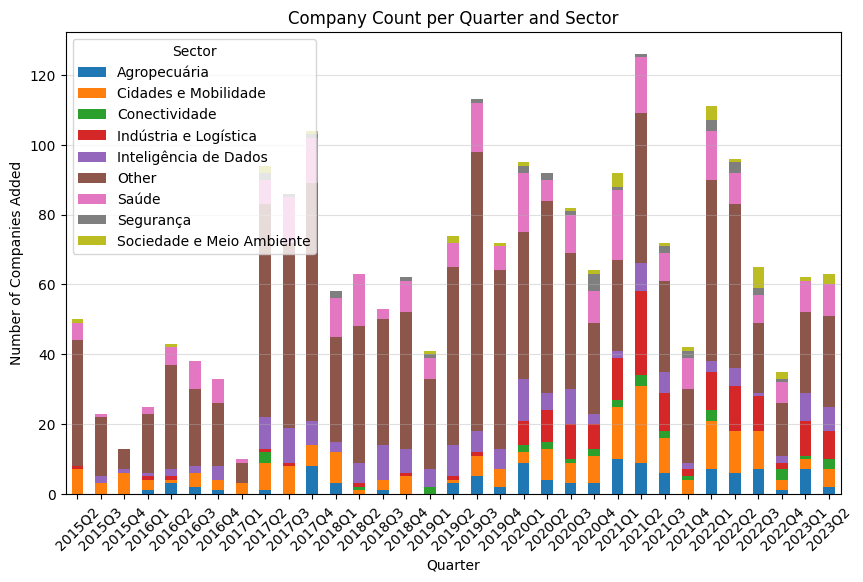

In [45]:
import matplotlib.pyplot as plt
import pandas as pd



# Extracting month and year from the Date column
df_Bar_Graph['Quarter'] = df_Bar_Graph['Date'].dt.to_period('Q')

# Counting the number of companies added per month and sector
company_count_per_quarter_sector = df_Bar_Graph.groupby(['Quarter', 'Sector']).size().unstack()




# Creating a stacked bar graph
company_count_per_month_sector.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Quarter')
plt.ylabel('Number of Companies Added')
plt.title('Company Count per Quarter and Sector')
plt.xticks(rotation=45) 
plt.set_cmap('tab10')
plt.grid(True, axis='y', alpha=0.4,)
# Displaying the graph
plt.show()


In [35]:
df_Bar_Graph.groupby(['Quarter', 'Sector']).size()


Quarter  Sector                   
2015Q2   Cidades e Mobilidade          7
         Indústria e Logística         1
         Other                        36
         Saúde                         5
         Sociedade e Meio Ambiente     1
                                      ..
2023Q2   Indústria e Logística         8
         Inteligência de Dados         7
         Other                        26
         Saúde                         9
         Sociedade e Meio Ambiente     3
Length: 228, dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d8deaceb-2c7c-4a7b-93ac-c2e9db6a48c8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>